# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ni Putu Putri Maheswari Paramhansa
- **Email:** niputuputri3@gmail.com
- **ID Dicoding:** 33_Ni Putu Putri Maheswari Paramhansa

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan bike-sharing per jam selama dua tahun terakhir, dan bagaimana perbedaannya pada hari kerja dibandingkan dengan akhir pekan?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda dalam dua tahun terakhir, dan pada kondisi cuaca apa pengguna lebih cenderung menyewa sepeda?
- Bagaimana pengaruh frekuensi penyewaan antara pengguna casual dan registered terhadap pendapatan perusahaan baik pada 2011 dan 2012?


## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# Memuat tabel day dan hours
day_df = pd.read_csv('/content/sample_data/day.csv')
hour_df = pd.read_csv('/content/sample_data/hour.csv')

In [6]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data yang perlu kita load yaitu tabel day dan tabel hour
- Data tersebut menggunakan format berkas csv sehingga menggunakan function read_csv()

### Assessing Data

In [8]:
# Memeriksa tipe data dari tiap kolom pada day_df
day_df.info()

# Memeriksa tipe data dari tiap kolom pada hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [9]:
# Memeriksa apakah ada duplicate data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

# Memeriksa parameter statistik dari kolom numerik pada day_df
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# Memeriksa apakah ada duplicate data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

# Memeriksa parameter statistik dari kolom numerik pada hour_df
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kolom "dteday" pada dataframe tersebut seharusnya direpresentasikan sebagai tipe data datetime, bukan object.
- Tidak ada duplicate data pada kedua dataframe, ditunjukkan dengan "Jumlah duplikasi: 0"
- Parameter statistik "min" pada kolom "hum" menunjukan nilai terkecil humidity yaitu 0. Hal itu janggal karena sekalipun dry weather, kurang memungkinkan apabila 0%. Oleh karena itu, diindikasikan adanya inaccurate value pada kolom "hum"

### Cleaning Data

In [11]:
# Mengubah tipe data pada kolom "dteday"
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [12]:
# Memeriksa ulang tipe data
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
day_df[day_df.hum == day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [14]:
hour_df[hour_df.hum == hour_df.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


In [15]:
# Menghitung mean untuk 'hum' berdasarkan weathersit = 3
mean_hum_weathersit = day_df.loc[day_df['weathersit'] == 3, 'hum'].mean()

# Ganti nilai 0 dalam 'hum' dengan mean yang sesuai
day_df['hum'].replace(0, mean_hum_weathersit, inplace=True)

<ipython-input-15-51e5fd89dba5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['hum'].replace(0, mean_hum_weathersit, inplace=True)


In [16]:
# Mengelompokkan data berdasarkan kondisi serupa
fit_conditions = hour_df.groupby(['temp', 'atemp', 'weathersit'])['hum'].transform(lambda x: x.replace(0, x.mean()))

# Menerapkan imputation pada DataFrame Anda
hour_df['hum'] = fit_conditions

In [17]:
# Memeriksa ulang jika masih ada 'hum' = 0
print(day_df[day_df['hum'] == 0])

print(hour_df[hour_df['hum'] == 0])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight:**
- Kolom "dteday" pada kedua dataframe sudah diganti sebagai tipe data datetime
- Untuk mengubah "hum" = 0 pada "hour_df", saya menggunakan mean dari data yang memiliki kondisi serupa (baik dari temp, atemp, weathersit), bukan dari semua kolom. Karena kelembaban dipengaruhi oleh temperatur dan juga cuaca pada saat itu. Dan tidak mungkin juga di cuaca seperti itu kelembaban berada di 0%.
- Sedangkan pada "day_df", proses penggantian "hum" = 0 saya berdasarkan mean dari data yang situasi cuacanya = 3, hal itu karena hanya ada satu data "hum" = 0 dan bersamaan dengan "weathersit" = 3. Sehingga jadi lebih sesuai

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

In [18]:
# Hubungan jumlah penyewaan sepeda berdasarkan jam
hourly_trend = hour_df.groupby('hr').agg({'cnt': 'sum'}).reset_index()
print(hourly_trend)

    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


**Insight:**
- Kita bisa melihat jam-jam sibuk ketika penyewaan sepeda paling tinggi.
- Walaupun jam umum orang bekerja dari 9-5, tetapi bisa dilihat mulai dari jam 8 sudah meempati penyewaan sepeda paling tinggi, karena idealnya orang juga memerlukan beberapa menit sebagai durasi untuk pergi ke kantor, hal itu sesuai dengan jam kerja orang pada umumnya.

In [19]:
# Membuat dua subset data: jam kerja dan di luar jam kerja
working_hours = hour_df[(hour_df['hr'] >= 8) & (hour_df['hr'] <= 17)]
after_hours = hour_df[(hour_df['hr'] < 8) | (hour_df['hr'] > 17)]

# Hubungan jumlah penyewaan selama jam kerja dan di luar jam kerja
work_hours_summary = working_hours['cnt'].sum()
after_hours_summary = after_hours['cnt'].sum()

print(f"Penyewaan Sepeda pada Jam Kerja: {work_hours_summary}")
print(f"Penyewaan Sepeda di Luar Jam Kerja: {after_hours_summary}")


Penyewaan Sepeda pada Jam Kerja: 1990758
Penyewaan Sepeda di Luar Jam Kerja: 1301921


**Insight:**
- Menunjukan apakah pengguna lebih sering menyewa sepeda di luar jam kerja atau justru selama jam kerja.
- Seperti yang terlihat, penyewaan sepeda pada jam kerja tentu lebih banyak (peak hours)

In [20]:
# Agregasi penyewaan sepeda berdasarkan hari kerja/akhir pekan dan jam
weekend_weekday = hour_df.pivot_table(values='cnt', index='hr', columns='workingday', aggfunc='mean').reset_index()

weekend_weekday.columns = ['Hour', 'Weekend (0)', 'Weekday (1)']

print(weekend_weekday)


    Hour  Weekend (0)  Weekday (1)
0      0    90.800000    36.786290
1      1    69.508696    16.552632
2      2    53.171053     8.683778
3      3    25.775330     4.942553
4      4     8.264317     5.429787
5      5     8.689189    24.913131
6      6    18.742358   102.500000
7      7    43.406926   290.612903
8      8   105.653680   477.006048
9      9   171.623377   241.518145
10    10   255.909091   135.366935
11    11   315.316017   158.229839
12    12   366.259740   200.820926
13    13   372.731602   198.429719
14    14   364.645022   183.572289
15    15   358.813853   201.331325
16    16   352.727273   293.122244
17    17   323.549784   525.290581
18    18   281.056522   492.226908
19    19   231.673913   348.401606
20    20   174.739130   249.718876
21    21   142.060870   186.287149
22    22   116.060870   138.389558
23    23    85.930435    88.708835


**Insight:**
- Pada weekday/workingday, penyewaan sepeda sangat tinggi di pagi hari (pukul 7-9), terutama untuk transportasi.
- Pada weekend, penyewaan lebih tinggi di siang hingga sore (pukul 10-18).

In [21]:
# Hubungan rata-rata penyewaan sepeda per jam berdasarkan tipe pengguna
rental_frequency = hour_df.groupby('hr').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
print(rental_frequency)


    hr     casual  registered
0    0  10.158402   43.739669
1    1   6.504144   26.871547
2    2   4.772028   18.097902
3    3   2.715925    9.011478
4    4   1.253945    5.098996
5    5   1.411437   18.478382
6    6   4.161379   71.882759
7    7  11.055021  201.009629
8    8  21.679505  337.331499
9    9  30.891334  188.418157
10  10  46.477304  127.191197
11  11  59.540578  148.602476
12  12  68.293956  185.021978
13  13  72.308642  181.352538
14  14  75.567901  165.381344
15  15  74.905350  176.327846
16  16  73.745205  238.238356
17  17  74.273973  387.178082
18  18  61.120879  364.390110
19  19  48.770604  262.752747
20  20  36.233516  189.796703
21  21  28.255495  144.059066
22  22  22.252747  109.082418
23  23  15.199176   72.631868


**Insight:**
- Registered mendominasi penyewaan terutama di jam kerja, dengan puncak penyewaan mencapai rerata 387 unit pada jam 17. Sementara itu, meskipun casual lebih banyak menyewa pada jam kerja, frekuensi penyewaan mereka tetap jauh lebih rendah dibandingkan registered.
- Casual menunjukkan peningkatan penyewaan pada jam-jam tertentu, mencerminkan ketergantungan mereka pada sepeda bukan untuk kebutuhan harian.

In [22]:
# Agregasi penyewaan sepeda berdasarkan kondisi cuaca
weather_trend = hour_df.groupby('weathersit').agg({
    'cnt': ['sum', 'mean', 'max', 'min', 'std']
}).reset_index()
print(weather_trend)

  weathersit      cnt                                 
                  sum        mean  max min         std
0          1  2338173  204.869272  977   1  189.487773
1          2   795952  175.165493  957   1  165.431589
2          3   158331  111.579281  891   1  133.781045
3          4      223   74.333333  164  23   77.925178


**Insight:**
- weathersit 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) jumlah penyewaannya tertinggi, dengan total **2,338,173** unit per jam. Hal ini menunjukkan bahwa kondisi cuaca yang lebih baik mendorong penggunaan sepeda yang lebih tinggi
- weathersit 3 dan 4, penyewaan sepeda jauh lebih rendah, menunjukkan bahwa cuaca yang buruk secara signifikan mengurangi ketertarikan pengguna untuk menyewa sepeda.

### Explore `day_df`

In [23]:
# Agregasi penggunaan sepeda berdasarkan musim
season_trend = day_df.groupby('season').agg({
    'cnt': ['sum', 'mean', 'max', 'min', 'std']
}).reset_index()
print(season_trend)



  season      cnt                                      
              sum         mean   max   min          std
0      1   471348  2604.132597  7836   431  1399.942119
1      2   918589  4992.331522  8362   795  1695.977235
2      3  1061129  5644.303191  8714  1115  1459.800381
3      4   841613  4728.162921  8555    22  1699.615261


**Insight:**
- Musim gugur (season 3) memiliki jumlah penyewaan tertinggi dengan **1,061,129** unit, menunjukkan bahwa meskipun secara suhu bisa lebih dingin, musim gugur tetap populer, karena keindahan alam dan suhu yang lebih nyaman.
- Musim panas (season 2) menunjukkan angka penyewaan tinggi pula yaitu dengan **918,589** unit, mencerminkan bahwa cuaca yang hangat dan aktivitas luar ruangan yang meningkat selama musim panas menarik lebih banyak pengguna untuk menyewa sepeda.

In [24]:
# Mengubah kolom dteday menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Membuat kolom baru untuk bulan dan tahun
day_df['year_month'] = day_df['dteday'].dt.to_period('M')

# Menghitung total penyewaan sepeda per bulan
monthly_trend = day_df.groupby('year_month').agg({'cnt': 'sum'}).reset_index()

# Melihat hasil total penyewaan per bulan
print(monthly_trend)


   year_month     cnt
0     2011-01   38189
1     2011-02   48215
2     2011-03   64045
3     2011-04   94870
4     2011-05  135821
5     2011-06  143512
6     2011-07  141341
7     2011-08  136691
8     2011-09  127418
9     2011-10  123511
10    2011-11  102167
11    2011-12   87323
12    2012-01   96744
13    2012-02  103137
14    2012-03  164875
15    2012-04  174224
16    2012-05  195865
17    2012-06  202830
18    2012-07  203607
19    2012-08  214503
20    2012-09  218573
21    2012-10  198841
22    2012-11  152664
23    2012-12  123713


**Insight:**
- Total penyewaan sepeda per bulan menunjukkan peningkatan yang signifikan pada bulan-bulan musim panas, terutama pada Mei hingga Agustus, dengan puncak mencapai **214,503** unit pada Agustus 2012. Hal ini sejalan dengan data musim yang menunjukkan bahwa musim panas (season 2) memiliki total penyewaan sebesar **918,589** unit,  bahwa cuaca hangat meningkatkan minat masyarakat untuk bersepeda.

- Pada musim dingin (season 4), total penyewaan sepeda mengalami penurunan, dengan angka hanya **841,613** unit sepanjang musim. Ini tercermin dalam tren bulanan, di mana bulan Desember mencatatkan penyewaan terendah, artinya cuaca dingin membuat orang kurang tertarik untuk menyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan bike-sharing per jam selama dua tahun terakhir, dan bagaimana perbedaannya pada hari kerja dibandingkan dengan akhir pekan?

<ipython-input-25-5b9eb92958fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df_2011['is_weekend'] = hour_df_2011['weekday'].apply(lambda x: 1 if x >= 5 else 0)
<ipython-input-25-5b9eb92958fd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df_2012['is_weekend'] = hour_df_2012['weekday'].apply(lambda x: 1 if x >= 5 else 0)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in

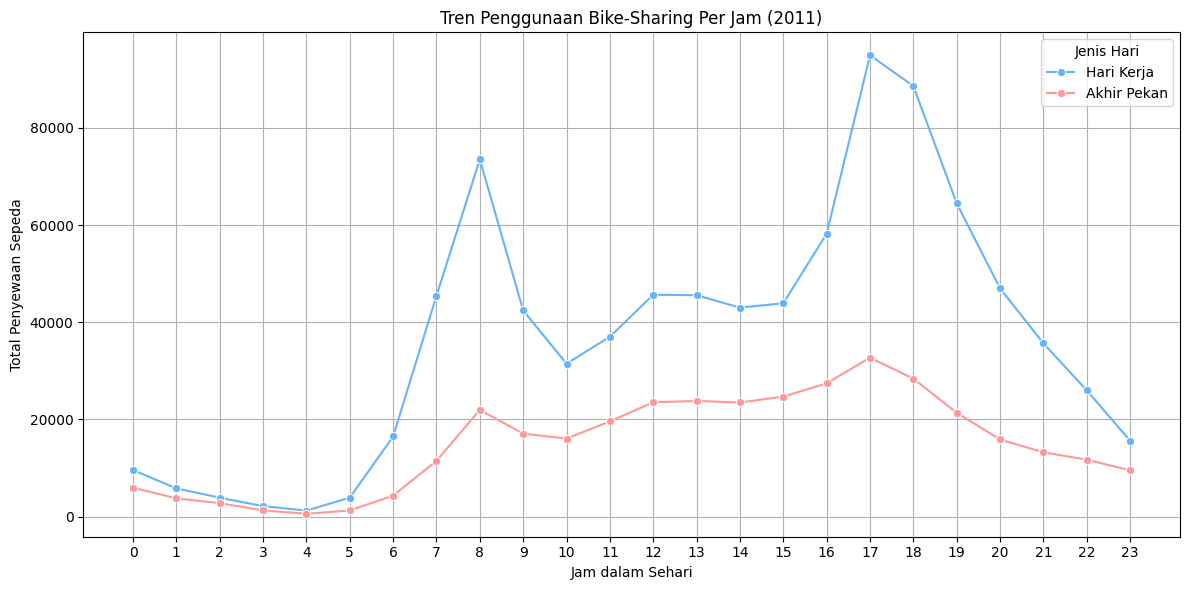

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


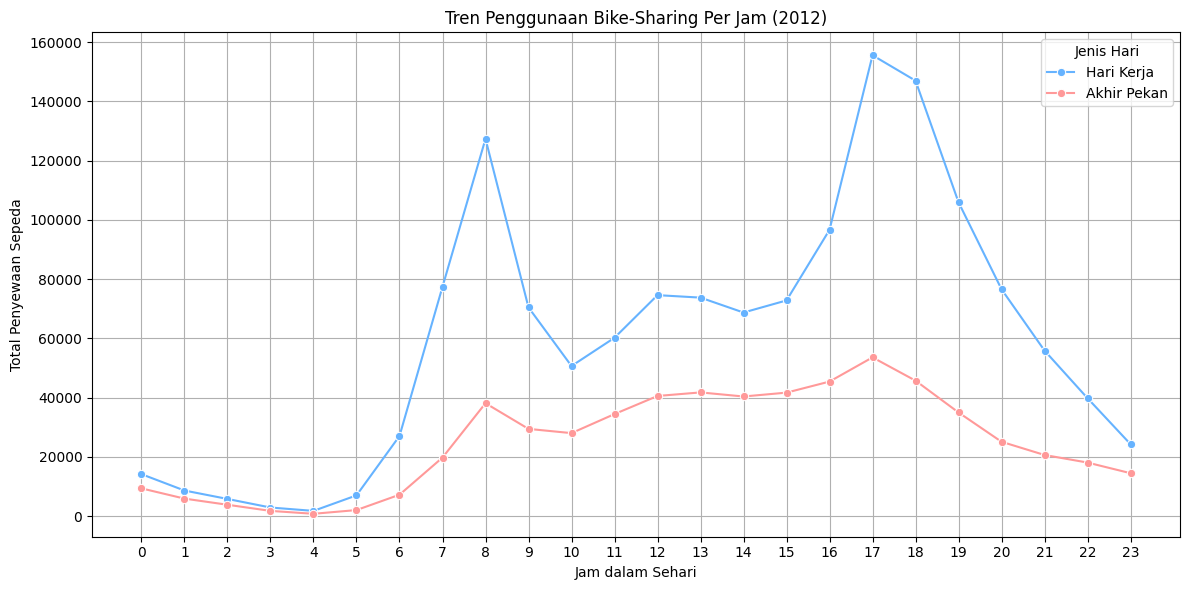

In [25]:
# Memastikan data yang diambil hanya data tahun 2011
hour_df_2011 = hour_df[hour_df['dteday'].dt.year == 2011]

# Memastikan data yang diambil hanya data tahun 2012
hour_df_2012 = hour_df[hour_df['dteday'].dt.year == 2012]

# Menentukan apakah hari tersebut adalah hari kerja atau akhir pekan
hour_df_2011['is_weekend'] = hour_df_2011['weekday'].apply(lambda x: 1 if x >= 5 else 0)
hour_df_2012['is_weekend'] = hour_df_2012['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Menghitung total penyewaan per jam untuk hari kerja dan akhir pekan untuk 2011
hourly_trends_2011 = hour_df_2011.groupby(['hr', 'is_weekend'])['cnt'].sum().reset_index()
hourly_trends_2011['is_weekend'] = hourly_trends_2011['is_weekend'].map({0: 'Hari Kerja', 1: 'Akhir Pekan'})

# Menghitung total penyewaan per jam untuk hari kerja dan akhir pekan untuk 2012
hourly_trends_2012 = hour_df_2012.groupby(['hr', 'is_weekend'])['cnt'].sum().reset_index()
hourly_trends_2012['is_weekend'] = hourly_trends_2012['is_weekend'].map({0: 'Hari Kerja', 1: 'Akhir Pekan'})

# Membuat grafik untuk tahun 2011
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trends_2011, x='hr', y='cnt', hue='is_weekend', marker='o', palette=['#66b3ff','#ff9999'])
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Penyewaan Sepeda')
plt.title('Tren Penggunaan Bike-Sharing Per Jam (2011)')
plt.xticks(range(0, 24))
plt.legend(title='Jenis Hari')
plt.grid(True)
plt.tight_layout()
plt.show()

# Membuat grafik untuk tahun 2012
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trends_2012, x='hr', y='cnt', hue='is_weekend', marker='o', palette=['#66b3ff','#ff9999'])
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Penyewaan Sepeda')
plt.title('Tren Penggunaan Bike-Sharing Per Jam (2012)')
plt.xticks(range(0, 24))
plt.legend(title='Jenis Hari')
plt.grid(True)
plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda dalam dua tahun terakhir, dan pada kondisi cuaca apa pengguna lebih cenderung menyewa sepeda?

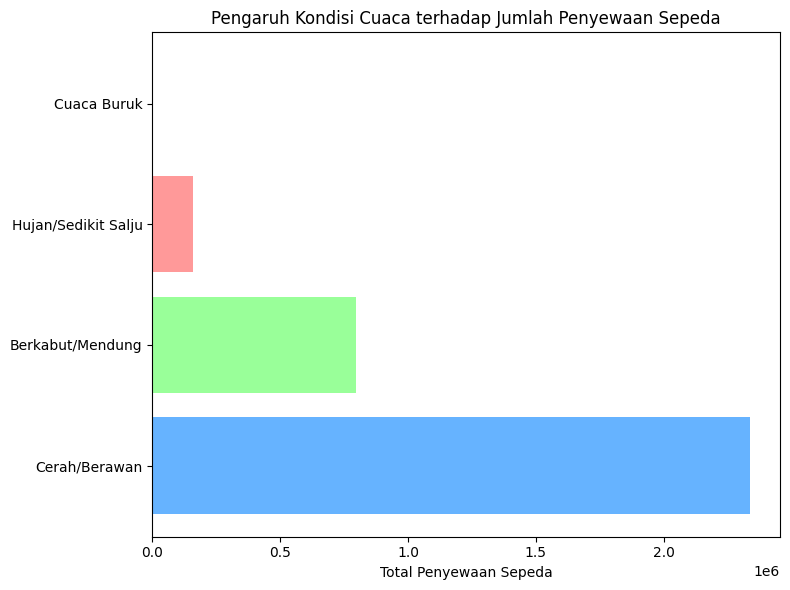

In [26]:
# Kelompokkan data berdasarkan kondisi cuaca, dan hitung total penyewaan sepeda pada setiap kondisi cuaca
weather_rentals = hour_df.groupby('weathersit')['cnt'].sum()

# Buat grafik batang horizontal untuk memvisualisasikan data
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data dengan grafik batang horizontal
ax.barh(weather_rentals.index, weather_rentals.values, color=['#66b3ff','#99ff99','#ff9999','#ffcc99'])

# Tambahkan label dan judul
ax.set_xlabel('Total Penyewaan Sepeda')
ax.set_title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')

# Ubah label sumbu x agar lebih jelas
ax.set_yticks(weather_rentals.index)
ax.set_yticklabels(['Cerah/Berawan', 'Berkabut/Mendung', 'Hujan/Sedikit Salju', 'Cuaca Buruk'])

# Tampilkan grafik
plt.tight_layout()
plt.show()


### Pertanyaan 3: Bagaimana pengaruh frekuensi penyewaan antara pengguna casual dan registered terhadap pendapatan perusahaan baik pada 2011 dan 2012?

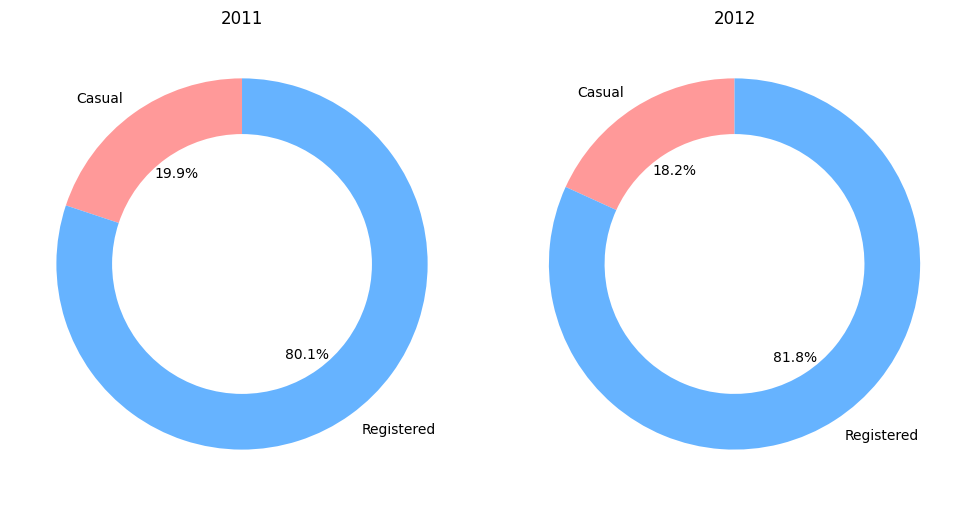

In [27]:
# Filter data untuk tahun 2011 and 2012
hour_df['yr'] = hour_df['yr'].replace({0: 2011, 1: 2012})
data_2011 = hour_df[hour_df['yr'] == 2011]
data_2012 = hour_df[hour_df['yr'] == 2012]

# Agregasi  total rentals untuk pengguna casual dan registered pada 2011 dan 2012
rentals_2011 = data_2011[['casual', 'registered']].sum()
rentals_2012 = data_2012[['casual', 'registered']].sum()

# Buat diagram donut
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Diagram Donut 2011
ax1.pie(rentals_2011, labels=['Casual', 'Registered'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], wedgeprops=dict(width=0.3))
ax1.set_title('2011')

# Diagram Donut 2012
ax2.pie(rentals_2012, labels=['Casual', 'Registered'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], wedgeprops=dict(width=0.3))
ax2.set_title('2012')

# Tampilkan plot
plt.tight_layout()
plt.show()

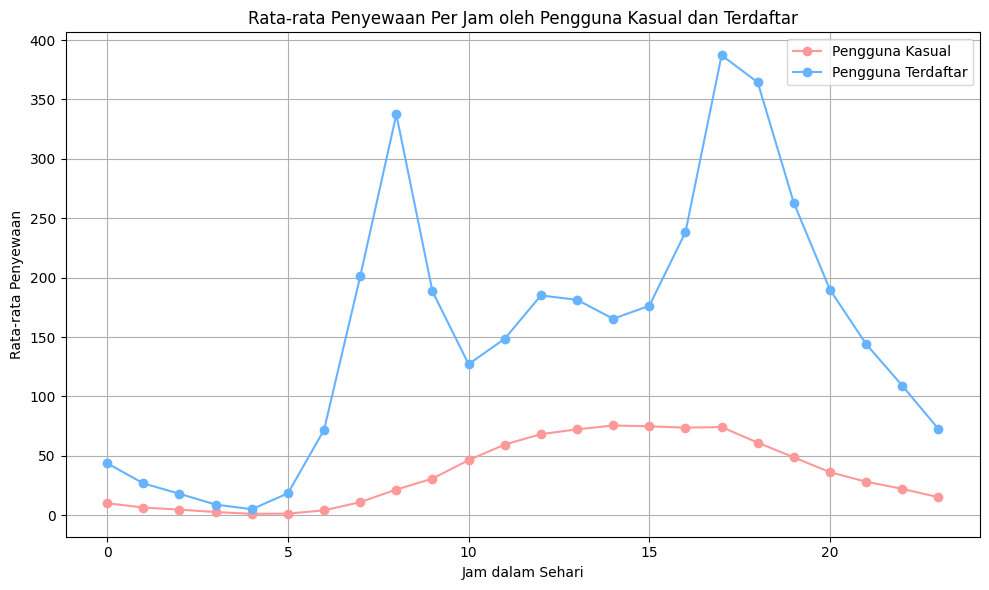

In [28]:
# Kelompokkan data berdasarkan jam untuk menemukan rata-rata penyewaan dari masing-masing jenis pengguna
hourly_data = hour_df.groupby('hr')[['casual', 'registered']].mean()

# Buat plot untuk menunjukkan rata-rata penyewaan per jam untuk pengguna kasual dan terdaftar
fig, ax = plt.subplots(figsize=(10, 6))

# Plot pengguna kasual
ax.plot(hourly_data.index, hourly_data['casual'], label='Pengguna Kasual', color='#ff9999', marker='o')

# Plot pengguna terdaftar
ax.plot(hourly_data.index, hourly_data['registered'], label='Pengguna Terdaftar', color='#66b3ff', marker='o')

# Tambahkan label sumbu dan judul grafik
ax.set_xlabel('Jam dalam Sehari')
ax.set_ylabel('Rata-rata Penyewaan')
ax.set_title('Rata-rata Penyewaan Per Jam oleh Pengguna Kasual dan Terdaftar')
ax.legend()

# Tampilkan grid dan sesuaikan tata letak
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**
- Sepanjang dua tahun terakhir, puncak penggunaan bike-sharing terjadi pada jam sibuk pagi dan sore, dengan puncak tertinggi sekitar jam 8 dan 17. Pada hari kerja, pengguna sepeda lebih aktif di jam-jam tersebut, sementara pada akhir pekan, penggunaan sepeda lebih merata sepanjang hari, dengan sedikit peningkatan di siang hingga sore hari.
- Kondisi cuaca yang baik (weathersit 1) secara signifikan meningkatkan jumlah penyewaan sepeda, dengan penyewaan tertinggi pada hari-hari cerah dan kondisi ideal. Pada cuaca buruk (weathersit 3 dan 4), penyewaan sepeda turun drastis, menunjukkan bahwa pengguna lebih cenderung menyewa sepeda saat cuaca mendukung, terutama pada hari-hari dengan cuaca cerah atau sedikit berawan.
- Mayoritas penyewaan sepeda berasal dari pengguna terdaftar, yang meningkat dari 80.1% pada tahun 2011 menjadi 81.8% pada tahun 2012, menunjukkan potensi pendapatan yang signifikan bagi perusahaan.

## Analisis Lanjutan (Opsional)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

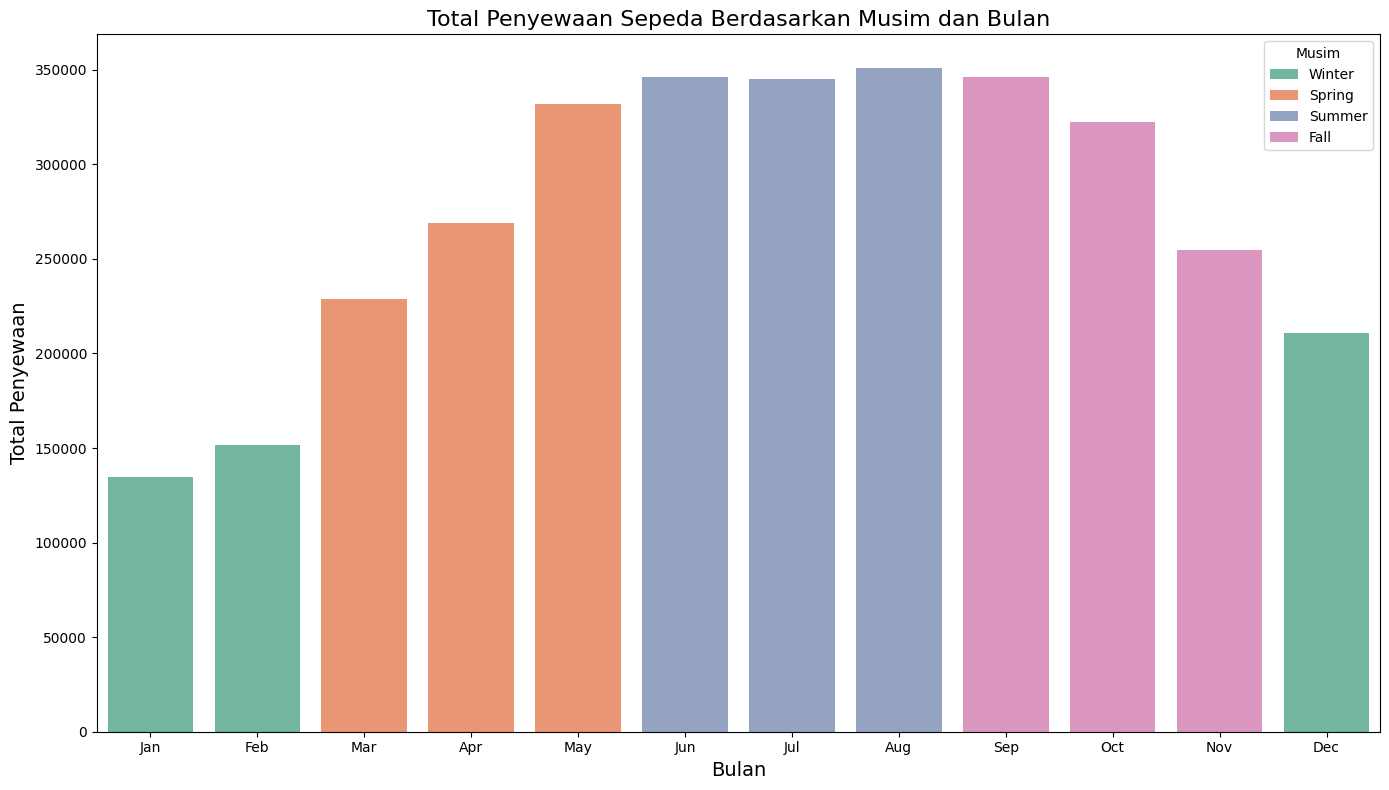

In [29]:
# Definisikan musim berdasarkan bulan
def get_season(mnth):
    if mnth in [3, 4, 5]:
        return 'Spring'
    elif mnth in [6, 7, 8]:
        return 'Summer'
    elif mnth in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Buat kolom baru untuk musim
hour_df['season'] = hour_df['mnth'].apply(get_season)

# Hitung total penyewaan berdasarkan musim dan bulan
season_month_grouped = hour_df.groupby(['season', 'mnth'])['cnt'].sum().reset_index()

# Grafik batang untuk pengelompokan musim dan bulan
plt.figure(figsize=(14, 8))
sns.barplot(data=season_month_grouped, x='mnth', y='cnt', hue='season', palette='Set2')
plt.title('Total Penyewaan Sepeda Berdasarkan Musim dan Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Musim')
plt.tight_layout()
plt.show()

- Berdasarkan analisis pengelompokan penyewaan sepeda berdasarkan musim dan bulan, terlihat bahwa musim panas (Summer) dan musim gugur (Fall) cenderung memiliki jumlah penyewaan yang lebih tinggi, terutama pada bulan Juli, Agustus, serta September dan Oktober. Pola ini menunjukkan bahwa pengguna lebih aktif menggunakan layanan bike-sharing pada bulan-bulan yang ideal dengan cuaca yang lebih hangat dan nyaman, sesuai dengan karakteristik musim tersebut.

Sementara itu, penyewaan pada musim dingin (Winter) cenderung lebih rendah, terutama pada bulan Januari dan Februari. Untuk memanfaatkan tren ini, perusahaan dapat mempertimbangkan untuk mengembangkan strategi pemasaran yang lebih agresif selama bulan-bulan puncak seperti musim panas dan gugur, seperti promosi dan paket bundling untuk meningkatkan jumlah penyewaan. Di sisi lain, perusahaan juga bisa mengeksplorasi cara untuk menarik pengguna di musim dingin, seperti menawarkan diskon atau program loyalitas bagi pengguna yang berani bersepeda dalam cuaca yang lebih dingin.

## Conclusion

- Conclution pertanyaan 1: Pada **2011**, penggunaan cenderung memuncak di pagi dan sore hari, dengan perbedaan antara hari kerja dan akhir pekan, di mana akhir pekan menunjukkan peningkatan penggunaan di siang hari. Pada **2012**, terlihat peningkatan penggunaan secara keseluruhan, terutama di pagi hari, dengan pola yang sama: hari kerja lebih aktif pada jam-jam sibuk seperti jam berangkat dan pulang kerja, sementara akhir pekan memiliki penggunaan lebih merata sepanjang hari, menunjukkan lebih banyak aktivitas rekreasi. Peningkatan penyewaan dari 2011 ke 2012 menunjukkan bahwa program bike-sharing semakin diterima masyarakat, sementara perbedaan pola antara hari kerja dan akhir pekan mengindikasikan bahwa sistem ini digunakan baik untuk keperluan komuter di hari kerja maupun rekreasi di akhir pekan.
- Pertanyaan 2: Dari analisis grafik, dapat disimpulkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda dalam dua tahun terakhir. Pada kondisi cuaca cerah atau berawan, penyewaan sepeda mencapai puncak tertinggi, dengan total lebih dari 1,5 juta penyewaan. Sebaliknya, pada saat cuaca berkabut atau mendung, meskipun penyewaan tetap ada, angkanya cenderung menurun, menunjukkan stabilitas yang lebih rendah. Selain itu, kondisi hujan, sedikit salju, dan cuaca buruk secara drastis mengurangi jumlah penyewaan, dengan angka terendah tercatat pada cuaca buruk. Insight ini menegaskan bahwa pengguna lebih cenderung menyewa sepeda saat kondisi cuaca bersahabat, menunjukkan bahwa untuk meningkatkan jumlah penyewaan, perusahaan sebaiknya mempertimbangkan faktor cuaca dalam strategi pemasaran dan promosi mereka.
- Pertanyaan 3: Berdasarkan grafik yang diberikan, mayoritas penyewaan sepeda dilakukan oleh pengguna terdaftar, sekitar 80.1% pada tahun 2011 dan meningkat menjadi 81.8% pada tahun 2012, yang menjadikan pengguna terdaftar sebagai sumber pendapatan utama. Hal ini berpotensi meningkatkan pendapatan perusahaan secara signifikan dari tahun ke tahun. Tetapi untuk meningkatkan pendapatan, perusahaan dapat meningkatkan loyalitas pengguna terdaftar melalui program diskon atau paket berlangganan, serta mendorong konversi pengguna kasual ke terdaftar dengan promosi seperti uji coba gratis. Diversifikasi layanan untuk pengguna kasual, seperti menawarkan tur sepeda wisata, juga bisa menjadi strategi efektif untuk menambah pendapatan.